## 4.1 从数据中学习（2021 2.8-2.10） 

本章主题是神经网络的学习，这里的“学习”指的是从训练数据中自动获得最优权重参数的过程。以损失函数为基准，找到能使它的值达到最小的权重参数。

 - 对于线性可分问题，感知机是可以利用数据自动学习的，但是对于非线性问题，感知机无法通过自动学习来解决
 - 在计算机领域，常用的特征量包括SIFT、SURF和HOG等 使用这些特征量将图像数据转换为向量，然后对转换后的向量使用机器学习中的SVM、KNN等分类器进行学习
 - 利用特征量和机器学习的方法中，特征量扔是由人工设计的，而在神经网络中。连图像中包含的重要特征量也都是由机器来学习的

**训练数据和测试数据**

机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和实验等。

首先，利用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。

泛化能力是指处理未被观察过的数据的能力，获得泛化能力是机器学习的最终目标。

**过拟合**

只对某个数据集过度拟合的状态称为过拟合 无法处理其他数据集

## 4.2 损失函数

神经网络中使用某个指标表示现在的状态 神经网络的学习中所用的指标称为损失函数，一般用均方误差和交叉熵误差等

损失函数是表示神经网络对监督数据多大程度上不拟合、多大程度上不一致的指标

- 均方误差

$ E=\frac{1}{2}\sum\limits_{k}(y_k-t_k)^2 $

In [1]:
import numpy as np
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]
def mean_square_error(y,t):
    return 0.5*np.sum((y-t)**2)

**one-hot表示：** 将正确解的标签表示为1，其他解标签表示为0的表示方法称为one-hot表示

In [2]:
y1 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_square_error(np.array(y),np.array(t))

0.09750000000000003

In [3]:
mean_square_error(np.array(y1),np.array(t))

0.5975

**交叉熵误差**

$E = - \sum\limits_{t=k} t_k log y_k$

$y_k$是神经网络的输出，$t_k$是正确解的标签。$t_k$中只有正确解的标签的索引为1，其他均为0

交叉熵误差的值是由正确解标签对应的输出结果决定的

In [4]:
# 交叉熵误差
def cross_entropy_error(y,t):
    delta = 10e-7
    return -np.sum(t*np.log(y+delta))

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.5108239571007129

In [6]:
y1 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y1),np.array(t))

2.3025750930440454

**mini-batch学习**

神经网络的学习是从训练数据中选出一批数据，称为mini-batch，然后对每个mini-batch进行学习，这种学习方式称为mini-batch学习

In [7]:
%run mnist.py

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [8]:
# %load mnist.py
#!/usr/bin/env python

# In[2]:


# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [9]:
# %load mnist_show.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [10]:
x_train.shape

(60000, 784)

In [11]:
t_train.shape

(60000,)

In [12]:
x_train.shape

(60000, 784)

In [13]:
t_train.shape

(60000,)

In [14]:
x_test.shape

(10000, 784)

In [15]:
t_test.shape

(10000,)

In [16]:
x_train.shape[0]

60000

In [17]:
# 从训练数据中随机抽取10个数据
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [18]:
x_batch

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
t_batch

array([3, 6, 1, 4, 4, 0, 3, 7, 1, 0], dtype=uint8)

mini-batch版交叉熵误差的实现

In [20]:
def cross_entropy_error(y,t):         #y是神经网络的输出，t是监督数据 y的维度为1时，需要改变数据的形状
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [21]:
# 当监督数据时标签形式，非one-hot表示，而是像“2”，“7”这样的标签时，交叉熵误差的实现
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7))/batch_size

## 4.3 数值微分 

In [22]:
#数值微分含有误差。为了减少这个误差，我们可以计算函数f在（x+h）和（x-h）之间的差分
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

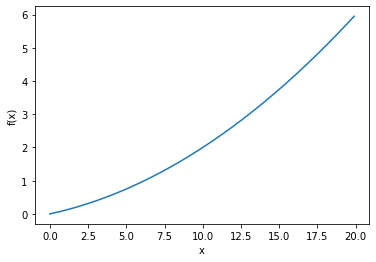

In [23]:
def function_1(x):
    return 0.01*x**2+0.1*x

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [24]:
numerical_diff(function_1,5)

0.1999999999990898

In [25]:
numerical_diff(function_1,10)

0.2999999999986347

0.1999999999990898
0.2999999999986347


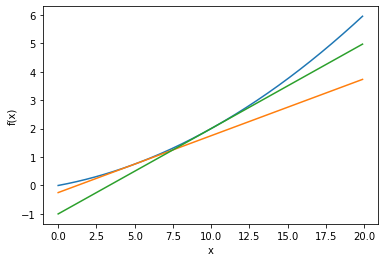

In [26]:
# 直线的斜率用数值微分的解
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
y1 = tf1(x)

tf2 = tangent_line(function_1,10)
y2 = tf2(x)

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x,y2)
plt.show()

## 4.4 梯度
考虑$(x_0,x_1)$的偏导数$(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$,像$(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$这样由全部变量的偏导数汇总而成的向量称为**梯度**

In [27]:
def function_2(x):
    return x[0]**2+x[1]**2

In [28]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)           #生成和x形状相同的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)的计算 
        x[idx] = tmp_val + h
        fxh1 = f(x)
        #f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

In [29]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [30]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

梯度会指向各点处的函数值降低的方向。更严格地讲，梯度指向的方向是各点出函数值减少最多的方向

一般而言，损失函数很复杂，参数空间庞大，通过巧妙地使用梯度来寻找函数最小值的方法就是梯度法。

把$f(x_0,x_1)=x_0^2+x_1^2$的梯度画出来，图示为元素值为负梯度的向量

No handles with labels found to put in legend.


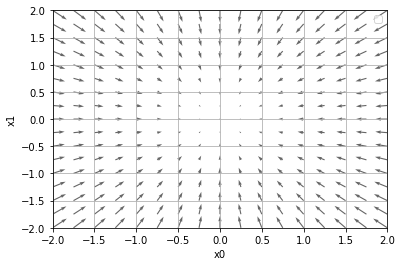

In [31]:
# %load gradient_2d.py
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

寻找最小值的梯度法称为梯度下降法，寻找最大值的梯度法称为梯度上升法。一般来说，在神经网络中的梯度法指的是梯度下降法。

In [32]:
# 实现梯度下降法
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x
# f是进行最优化的函数，init_x是初始值，lr是学习率，step_num是梯度法的重复次数

使用这个函数可以就目标函数的极小值，顺利的话，还可以求函数的最小值

In [33]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [34]:
#学习率过大或过小都无法得到好的结果
#学习率过大 lr=10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [35]:
#学习率过小 lr=1e-5
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-5, step_num=100)

array([-2.99400594,  3.99200791])

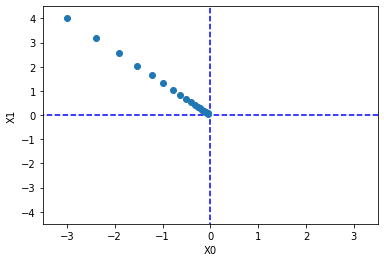

In [36]:
# 用图表示梯度法的更新过程
# %load gradient_method.py
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

**神经网络的梯度**

神经网络的学习也要求梯度，这里的梯度指的是损失函数关于权重参数的梯度

In [37]:
# %load gradient_simplenet.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)          #用高斯分布进行初始化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):                    #这里x接受输入数据，t接受正确解标签
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.07942776  0.11748559 -0.19691335]
 [ 0.11914164  0.17622838 -0.29537002]]


In [38]:
net = simpleNet()
print(net.W)                   #权重参数

[[-1.74898207  0.599585    0.98098842]
 [ 1.2959515   0.28067342 -0.75972284]]


In [39]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 0.11696711  0.61235708 -0.0951575 ]


In [40]:
np.argmax(p)

1

In [41]:
t = np.array([1,0,0])            #正确解标签
net.loss(x,t)

1.2383744695203962

In [42]:
t = np.array([0,1,0])            #正确解标签
net.loss(x,t)

0.742984630982151

In [43]:
def f(w):                      #这里的参数w是一个伪参数
    return net.loss(x,t)
# f = lambda w:net.loss(x,t)

In [44]:
dw = numerical_gradient(f,net.W)
dw

array([[ 0.17391291, -0.31458478,  0.14067187],
       [ 0.26086936, -0.47187716,  0.21100781]])

## 4.5学习算法的实现 

神经网络的学的步骤如下所示：

**前提**
神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成以下四个步骤。

**步骤一（mini-batch）**\
从训练数据中随机选出一部分数据，这部分数据称为mini-batch，我们的目标是减小mini-batch的损失函数的值。

**步骤二（计算梯度）**\
为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减少最多的方向。

**步骤三（更新参数）**\
将权重参数沿梯度方向进行微小更新

**步骤四**\
重复步骤一、二、三

### 例:2层神经网络的类

In [45]:
# %load two_layer_net.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):       #输入层、隐藏层、输出层的神经元数
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)    
        self.params['b2'] = np.zeros(output_size)                                 #权重使用符合高斯分布的随机数进行初始化，偏置使用0进行初始化             
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [46]:
# 实例化
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
net.params['W1'].shape

(784, 100)

In [47]:
net.params['b1'].shape

(100,)

In [48]:
net.params['W2'].shape

(100, 10)

In [49]:
net.params['b2'].shape

(10,)

In [50]:
# 推理处理的实现
x = np.random.rand(100,784)             #伪输入数据（100笔）
y = net.predict(x)

In [51]:
# 梯度的信息
x = np.random.randn(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)
# 计算梯度需要一段时间

In [52]:
grads['W1'].shape

(784, 100)

In [53]:
grads['b1'].shape

(100,)

In [54]:
grads['W2'].shape

(100, 10)

In [55]:
grads['b2'].shape

(10,)

### mini-batch的实现 

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7931166666666667, 0.7961
train acc, test acc | 0.8743833333333333, 0.8762
train acc, test acc | 0.8973166666666667, 0.8985
train acc, test acc | 0.9076666666666666, 0.9085
train acc, test acc | 0.9143333333333333, 0.9151
train acc, test acc | 0.9191833333333334, 0.9218
train acc, test acc | 0.92395, 0.9263
train acc, test acc | 0.9272166666666667, 0.9287
train acc, test acc | 0.9308166666666666, 0.9314
train acc, test acc | 0.9337666666666666, 0.934
train acc, test acc | 0.9359333333333333, 0.9369
train acc, test acc | 0.9381833333333334, 0.9384
train acc, test acc | 0.9406166666666667, 0.9409
train acc, test acc | 0.94245, 0.9425
train acc, test acc | 0.9448833333333333, 0.9436
train acc, test acc | 0.9463833333333334, 0.9457


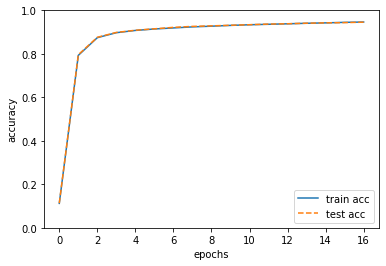

In [58]:
# %load train_neuralnet.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

这里的mini-batch的大小为100，需要每次从60000个训练数据中随机取出100个数据 对着个包含100笔数据的mini-batch求梯度，使用SGD更新参数\
这里梯度法的更新次数为10000，每更新一次，都对训练数据计算损失函数的值，并把该值添加到数组中